In [72]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, linalg as sla
from math import pi
import magnetic_boundaries as mb

In [81]:
parameters = dict(
    Ly = 31,
    Lx = 31,
    theta_top = 0,
    theta_bot = 0,
    mag_field = 0.1,
    noise = 0.1,
    seed = 1,
    mass = 0,
)
nbands = (parameters['Lx']*parameters['Ly'])//2

spectrum = mb.tan_square_spectrum(parameters, nbands)

(0.0, 3.0)

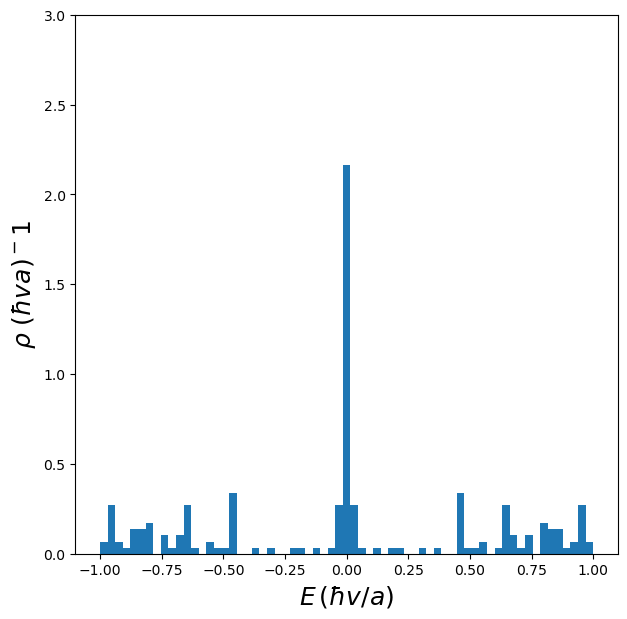

In [82]:
nbins = parameters['Lx']*parameters['Ly']//15+1-(parameters['Lx']*parameters['Ly']//15)%2
#The previous line ensures that the amount of bins is proportional to the system size and always odd.
density_of_states, bin_edges = np.histogram(spectrum, bins = nbins, range = (-1,1), density = False)

x = (bin_edges[1:]+bin_edges[:-1])/2
dx = (bin_edges[1]-bin_edges[0])

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
area = parameters['Lx']*parameters['Ly']
ax.bar(x,density_of_states/dx/area,width = dx)
ax.set_ylabel(r"$\rho$ $(\hbar va)^-1$",fontsize = 18)
ax.set_xlabel(r"$E\,(\hbar v/a)$",fontsize = 18)
#ax.axvline(np.sqrt(2*parameters['mag_field']), c = 'C3') #First Landau level
ax.set_ylim(0,3)

In [64]:
print(nbins)

171


In [65]:
parameters_graphene = {
    'width' : 35, # This is in units of 3a
    'length' : 35,# This is in units of sqrt(3)a
    'bottom_bearded' : True,
    'top_bearded' : False,
    'mag_field' : 0.1,
    'noise' : 0,
    'seed' : 0
             }
#Calculate spectrum
spectrum_graphene = mb.graphene_spectrum(parameters_graphene)

(0.0, 3.0)

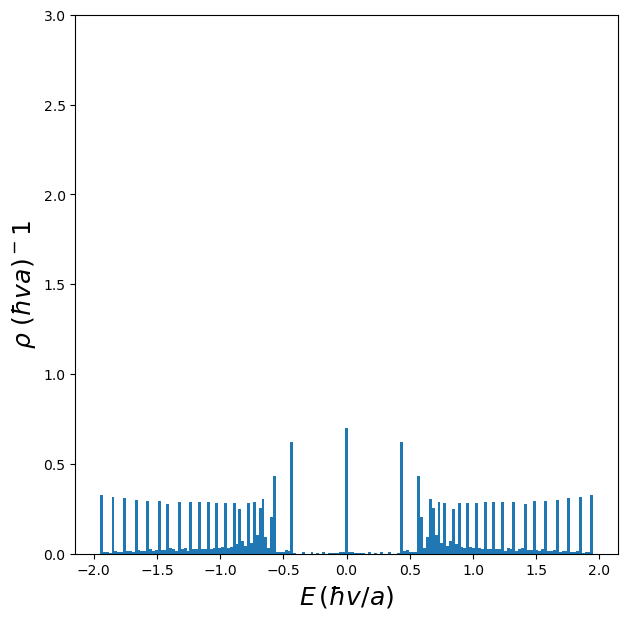

In [66]:
nbins_graphene = parameters_graphene['width']*parameters_graphene['length']//2+1-(parameters_graphene['width']*parameters_graphene['length']//2)%2
nbins_graphene = 171
#The previous line ensures that the amount of bins is proportional to the system size and always odd.
density_of_states_graphene, bin_edges_graphene = np.histogram(spectrum_graphene, bins = nbins_graphene, density = False)

x_graphene = (bin_edges_graphene[1:]+bin_edges_graphene[:-1])/2
dx_graphene = (bin_edges_graphene[1]-bin_edges_graphene[0])

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
area_graphene = parameters_graphene['width']*parameters_graphene['length']*3*np.sqrt(3)
ax.bar(x_graphene,density_of_states_graphene/dx_graphene/area_graphene/2,width = dx_graphene)
ax.set_ylabel(r"$\rho$ $(\hbar va)^-1$",fontsize = 18)
ax.set_xlabel(r"$E\,(\hbar v/a)$",fontsize = 18)
#ax.axvline(np.sqrt(2*parameters['mag_field']), c = 'C3') #First Landau level
ax.set_ylim(0,3)

(0.0, 1.75)

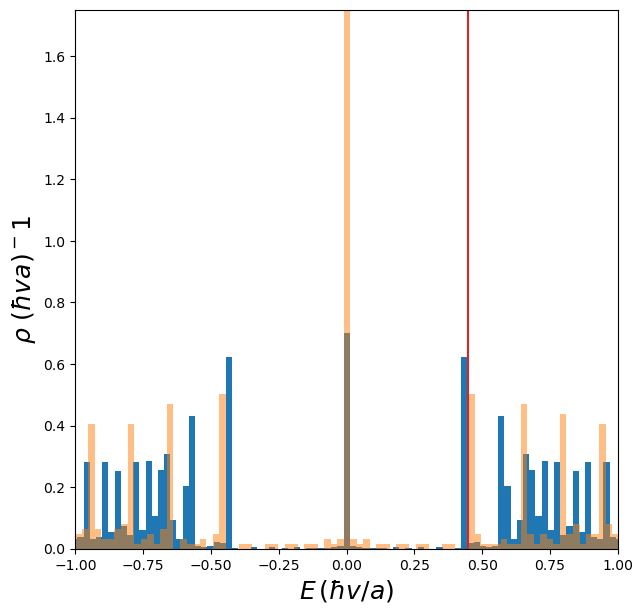

In [68]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
area_graphene = parameters_graphene['width']*parameters_graphene['length']*3*np.sqrt(3)
ax.bar(x_graphene,density_of_states_graphene/dx_graphene/area_graphene/2,width = dx_graphene)
ax.bar(x,density_of_states/dx/area,width = dx, alpha = 0.5)
ax.set_ylabel(r"$\rho$ $(\hbar va)^-1$",fontsize = 18)
ax.set_xlabel(r"$E\,(\hbar v/a)$",fontsize = 18)
ax.axvline(np.sqrt(2*parameters['mag_field']), c = 'C3') #First Landau level
ax.set_ylim(0,0.5)
ax.set_xlim(-1,1)
ax.set_ylim(0,1.75)